# Neural Network Notebook: 
***
Worked on by Brody Roberts

In [23]:
#Imports for the project: 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense



In [24]:
import pandas as pd
data=pd.read_csv("Diabetes.csv")
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000
mean,3.332865,122.934691,70.699438,29.195927,154.764747,32.926615,0.524782,30.801966,0.359551
std,3.220872,30.406764,11.915708,10.584212,120.038657,6.946669,0.375039,10.104519,0.480037
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,21.000000,74.000000,27.900000,0.264000,24.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.100000,0.434000,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,192.000000,36.900000,0.677250,35.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:

out_1 = data[data.Outcome == 1]
out_0 = data[data.Outcome == 0]

out_1.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
2,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0
3,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0
4,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59.0,1.0
5,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0,1.0


In [26]:

out_0.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
7,1.0,103.0,30.0,38.0,83.0,43.3,0.183,33.0,0.0
9,3.0,126.0,88.0,41.0,235.0,39.3,0.704,27.0,0.0
12,1.0,97.0,66.0,15.0,140.0,23.2,0.487,22.0,0.0
13,13.0,145.0,82.0,19.0,110.0,22.2,0.245,57.0,0.0


Percentage with 1s:  35.95505617977528 
Percentage with 0s:  64.04494382022472


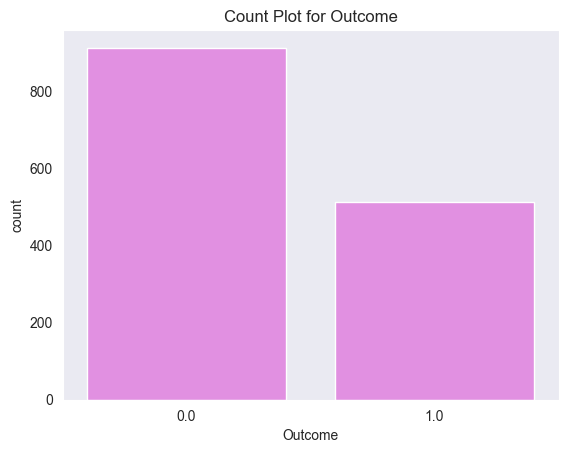

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = data.Outcome, color="Violet")
plt.title("Count Plot for Outcome")


num1= len(data[data.Outcome == 1])
num0 = len(data[data.Outcome == 0])



Total = num1 + num0

percentage_1 = (num1*100) / Total
percentage_0 = (num0*100) / Total

print("Percentage with 1s: ", percentage_1, "\nPercentage with 0s: ", percentage_0)

<Axes: title={'center': 'Histogram for Age'}, xlabel='Age', ylabel='Count'>

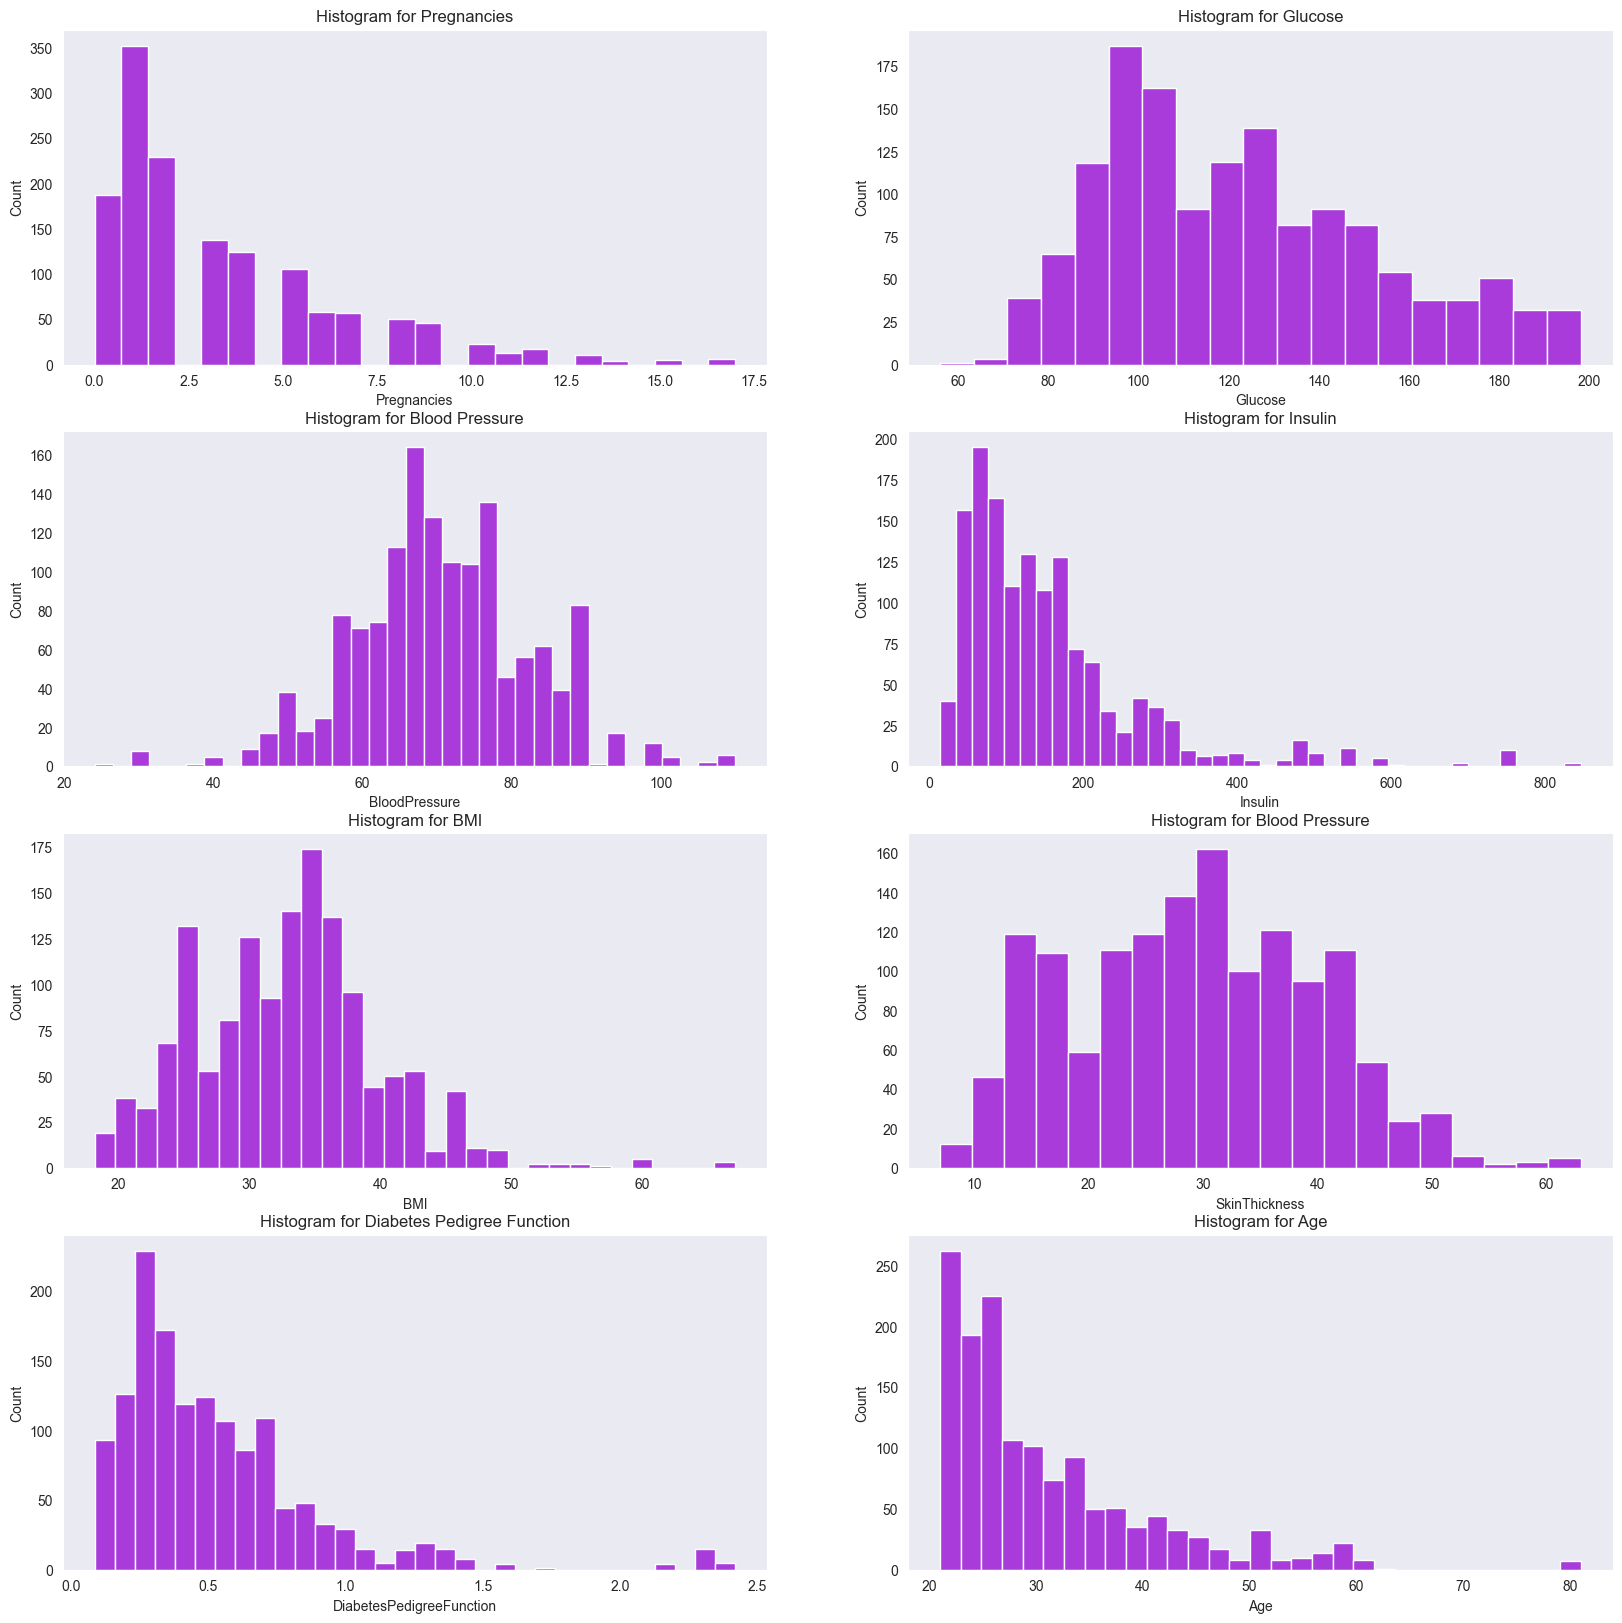

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))

# 1st histogram for Pregnancies
plt.subplot(4, 2, 1)
sns.set_style("dark")
plt.title("Histogram for Pregnancies")
sns.histplot(data.Pregnancies, kde=False, color="DarkViolet")

# 1st histogram for Pregnancies
plt.subplot(4 ,2, 2)
sns.set_style("dark")
plt.title("Histogram for Glucose")
sns.histplot(data.Glucose, kde=False, color="DarkViolet")

# 1st histogram for Pregnancies
plt.subplot(4, 2, 3)
sns.set_style("dark")
plt.title("Histogram for Blood Pressure")
sns.histplot(data.BloodPressure, kde=False, color="DarkViolet")

# 1st histogram for Pregnancies
plt.subplot(4, 2, 4)
sns.set_style("dark")
plt.title("Histogram for Insulin")
sns.histplot(data.Insulin, kde=False, color="DarkViolet")

# 1st histogram for Pregnancies
plt.subplot(4, 2, 5)
sns.set_style("dark")
plt.title("Histogram for BMI")
sns.histplot(data.BMI, kde=False, color="DarkViolet")

# 1st histogram for Pregnancies
plt.subplot(4, 2, 6)
sns.set_style("dark")
plt.title("Histogram for Blood Pressure")
sns.histplot(data.SkinThickness, kde=False, color="DarkViolet")

# 1st histogram for Pregnancies
plt.subplot(4, 2, 7)
sns.set_style("dark")
plt.title("Histogram for Diabetes Pedigree Function")
sns.histplot(data.DiabetesPedigreeFunction, kde=False, color="DarkViolet")

# 1st histogram for Pregnancies
plt.subplot(4, 2, 8)
sns.set_style("dark")
plt.title("Histogram for Age")
sns.histplot(data.Age, kde=False, color="DarkViolet")



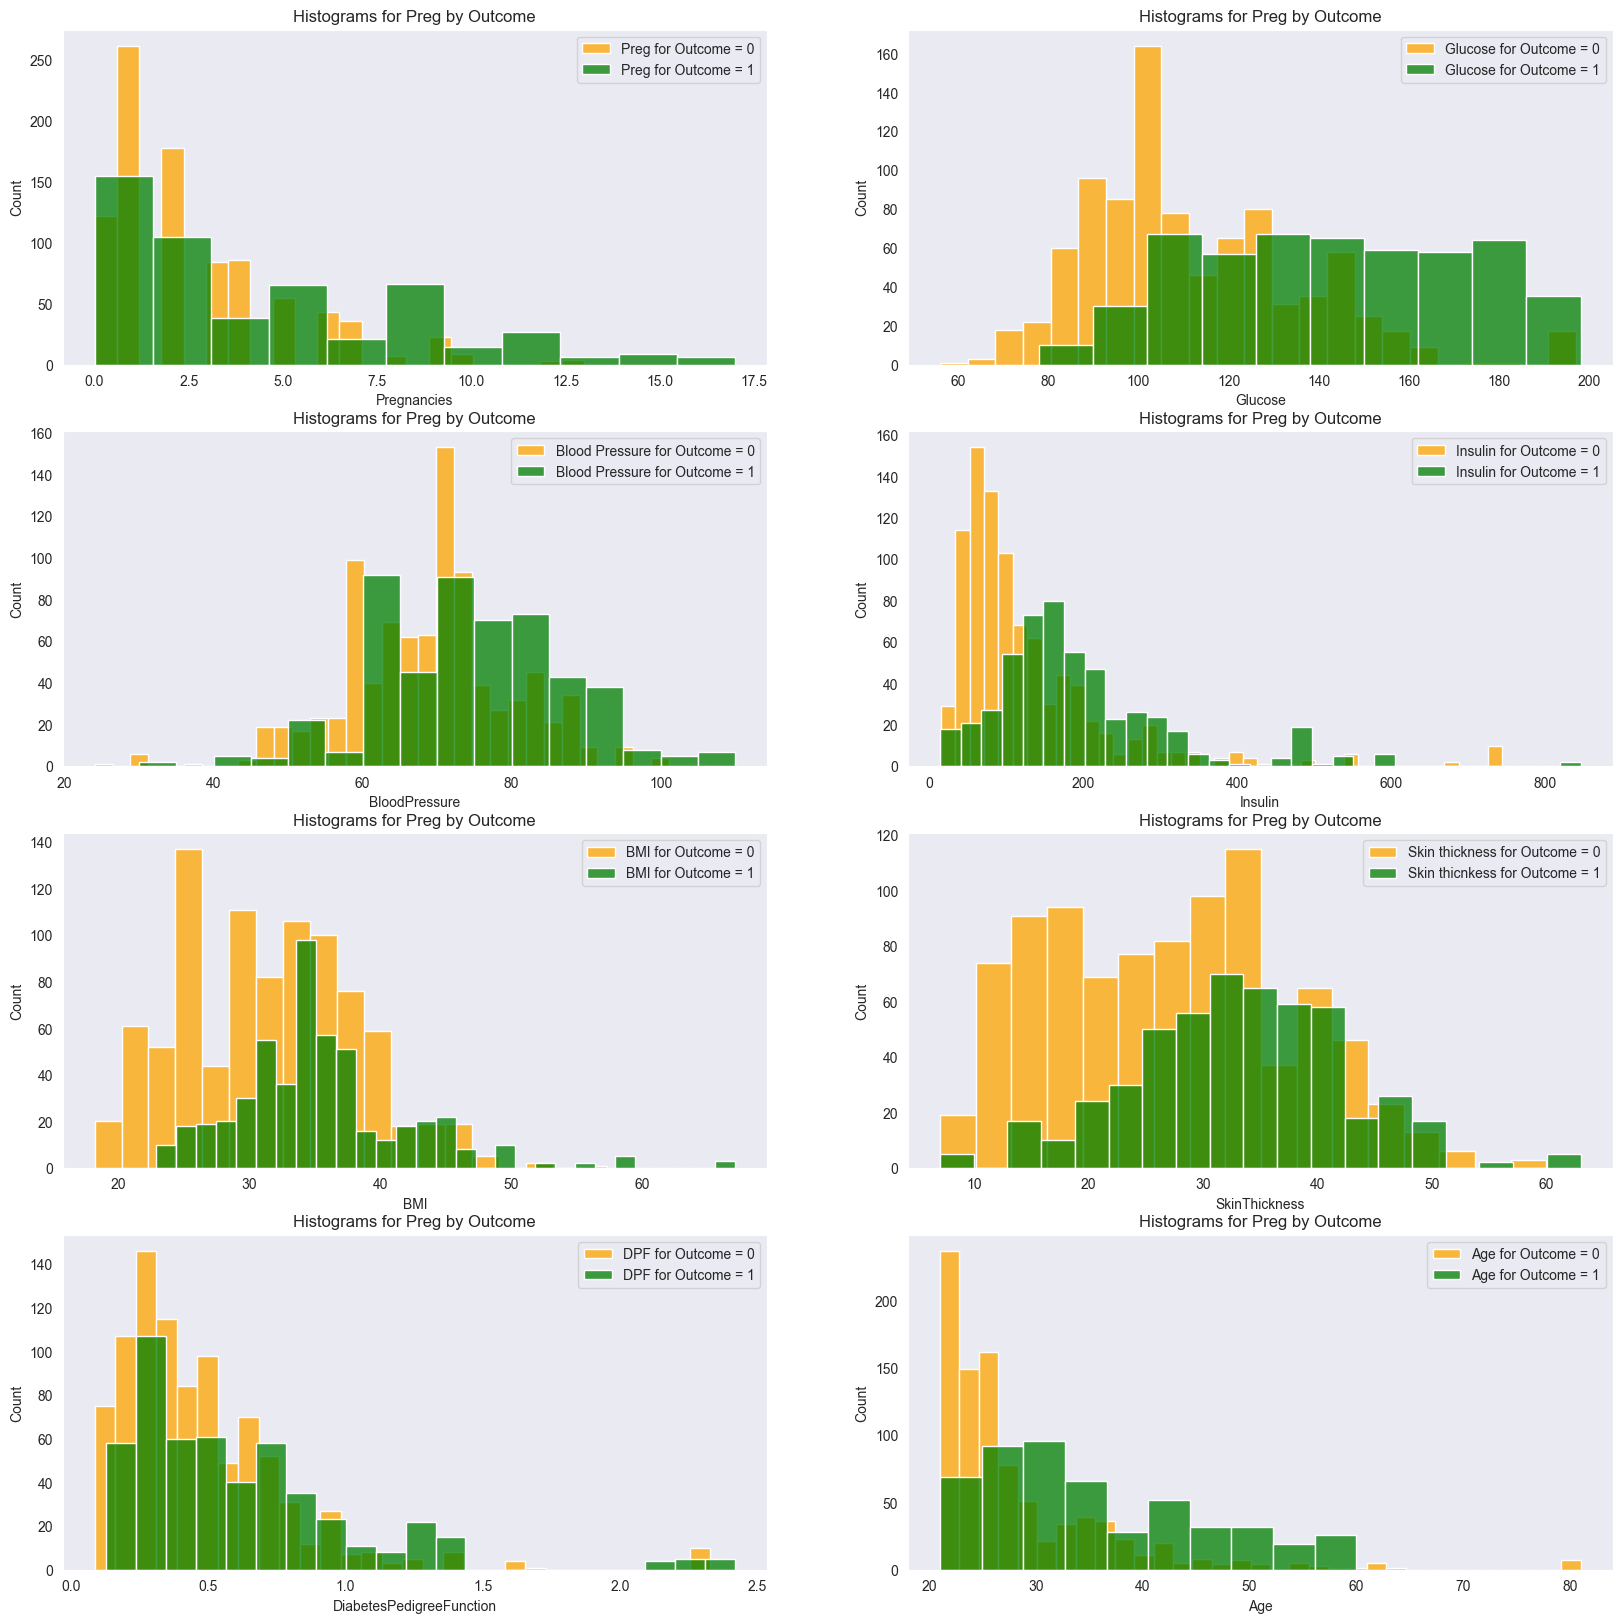

In [29]:
plt.figure(figsize=(20, 20))
# 2nd histogram segmented by Outcome
plt.subplot(4, 2, 1)
sns.histplot(out_0.Pregnancies, kde=False, color="Orange", label="Preg for Outcome = 0")
sns.histplot(out_1.Pregnancies, kde=False, color="Green", label="Preg for Outcome = 1")
plt.title("Histograms for Preg by Outcome")
plt.legend()

plt.subplot(4, 2, 2)
sns.histplot(out_0.Glucose, kde=False, color="Orange", label="Glucose for Outcome = 0")
sns.histplot(out_1.Glucose, kde=False, color="Green", label="Glucose for Outcome = 1")
plt.title("Histograms for Preg by Outcome")
plt.legend()

plt.subplot(4, 2, 3)
sns.histplot(out_0.BloodPressure, kde=False, color="Orange", label="Blood Pressure for Outcome = 0")
sns.histplot(out_1.BloodPressure, kde=False, color="Green", label="Blood Pressure for Outcome = 1")
plt.title("Histograms for Preg by Outcome")
plt.legend()

plt.subplot(4, 2, 4)
sns.histplot(out_0.Insulin, kde=False, color="Orange", label="Insulin for Outcome = 0")
sns.histplot(out_1.Insulin, kde=False, color="Green", label="Insulin for Outcome = 1")
plt.title("Histograms for Preg by Outcome")
plt.legend()

plt.subplot(4, 2, 5)
sns.histplot(out_0.BMI, kde=False, color="Orange", label="BMI for Outcome = 0")
sns.histplot(out_1.BMI, kde=False, color="Green", label="BMI for Outcome = 1")
plt.title("Histograms for Preg by Outcome")
plt.legend()

plt.subplot(4, 2, 6)
sns.histplot(out_0.SkinThickness, kde=False, color="Orange", label="Skin thickness for Outcome = 0")
sns.histplot(out_1.SkinThickness, kde=False, color="Green", label="Skin thicnkess for Outcome = 1")
plt.title("Histograms for Preg by Outcome")
plt.legend()

plt.subplot(4, 2, 7)
sns.histplot(out_0.DiabetesPedigreeFunction, kde=False, color="Orange", label="DPF for Outcome = 0")
sns.histplot(out_1.DiabetesPedigreeFunction, kde=False, color="Green", label="DPF for Outcome = 1")
plt.title("Histograms for Preg by Outcome")
plt.legend()

plt.subplot(4, 2, 8)
sns.histplot(out_0.Age, kde=False, color="Orange", label="Age for Outcome = 0")
sns.histplot(out_1.Age, kde=False, color="Green", label="Age for Outcome = 1")
plt.title("Histograms for Preg by Outcome")
plt.legend()



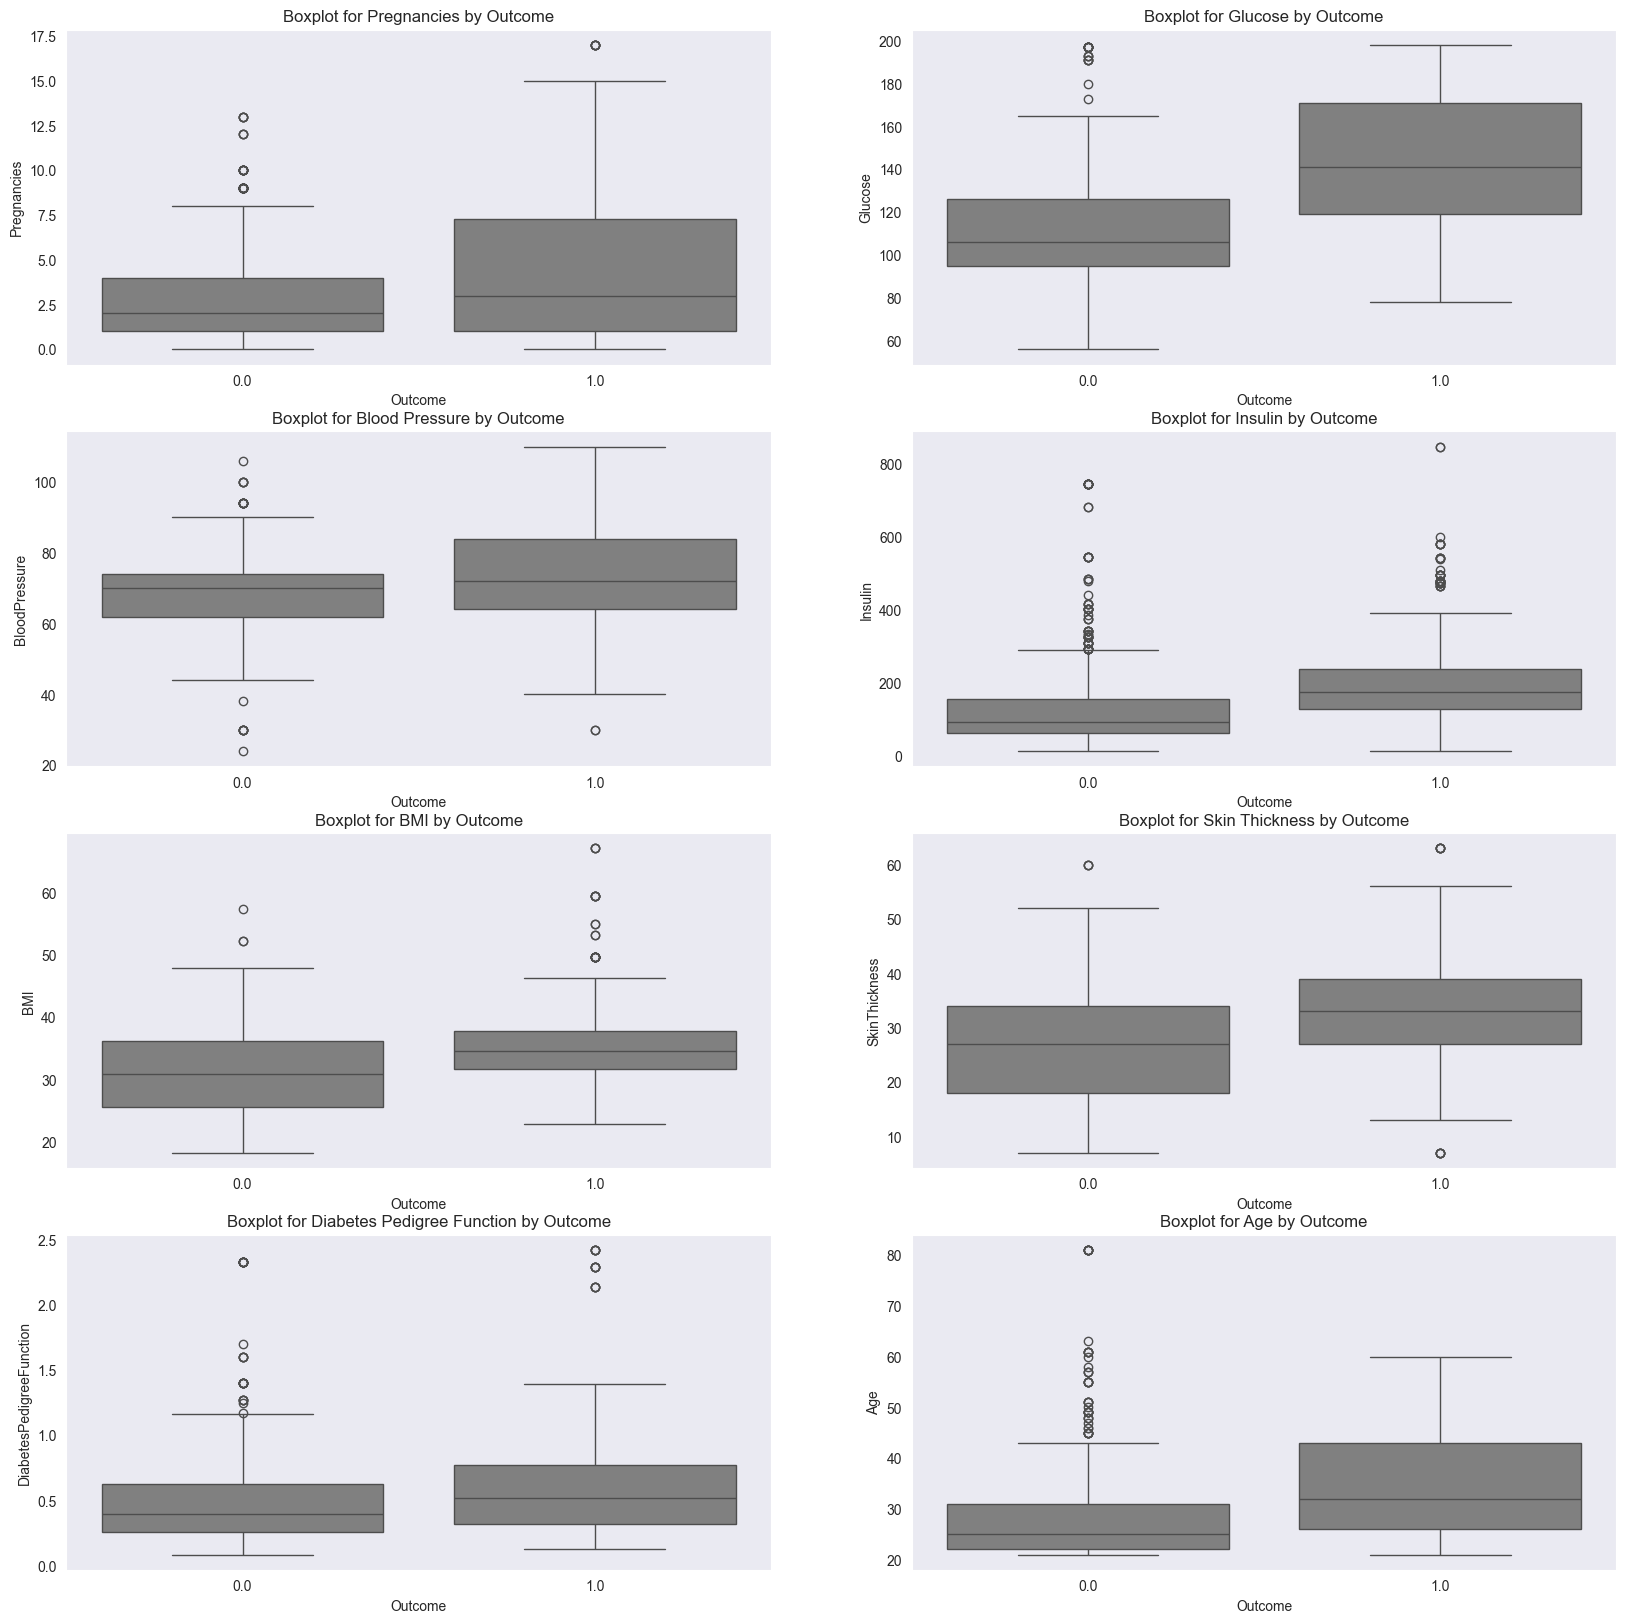

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))

plt.subplot(4, 2, 1)
sns.boxplot(x=data.Outcome, y=data.Pregnancies, color="Grey")
plt.title("Boxplot for Pregnancies by Outcome")

plt.subplot(4, 2, 2)
sns.boxplot(x=data.Outcome, y=data.Glucose, color="Grey")
plt.title("Boxplot for Glucose by Outcome")

plt.subplot(4, 2, 3)
sns.boxplot(x=data.Outcome, y=data.BloodPressure, color="Grey")
plt.title("Boxplot for Blood Pressure by Outcome")

plt.subplot(4, 2, 4)
sns.boxplot(x=data.Outcome, y=data.Insulin, color="Grey")
plt.title("Boxplot for Insulin by Outcome")

plt.subplot(4, 2, 5)
sns.boxplot(x=data.Outcome, y=data.BMI, color="Grey")
plt.title("Boxplot for BMI by Outcome")

plt.subplot(4, 2, 6)
sns.boxplot(x=data.Outcome, y=data.SkinThickness, color="Grey")
plt.title("Boxplot for Skin Thickness by Outcome")

plt.subplot(4, 2, 7)
sns.boxplot(x=data.Outcome, y=data.DiabetesPedigreeFunction, color="Grey")
plt.title("Boxplot for Diabetes Pedigree Function by Outcome")

plt.subplot(4, 2, 8)
sns.boxplot(x=data.Outcome, y=data.Age, color="Grey")
plt.title("Boxplot for Age by Outcome")

plt.show()


In [31]:
cor = data.corr(method ='pearson')
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.261288,0.192270,0.114225,0.121195,-0.003751,-0.001223,0.663302,0.272514
Glucose,0.261288,1.000000,0.217532,0.270747,0.616787,0.225311,0.197717,0.339186,0.483877
BloodPressure,0.192270,0.217532,1.000000,0.243047,0.120021,0.327559,-0.036149,0.276563,0.207615
SkinThickness,0.114225,0.270747,0.243047,1.000000,0.261411,0.699762,0.176425,0.175404,0.285295
Insulin,0.121195,0.616787,0.120021,0.261411,1.000000,0.265882,0.254068,0.214648,0.271135
BMI,-0.003751,0.225311,0.327559,0.699762,0.265882,1.000000,0.139451,0.074536,0.287020
DiabetesPedigreeFunction,-0.001223,0.197717,-0.036149,0.176425,0.254068,0.139451,1.000000,0.075319,0.179863
Age,0.663302,0.339186,0.276563,0.175404,0.214648,0.074536,0.075319,1.000000,0.332698
Outcome,0.272514,0.483877,0.207615,0.285295,0.271135,0.287020,0.179863,0.332698,1.000000


<Axes: >

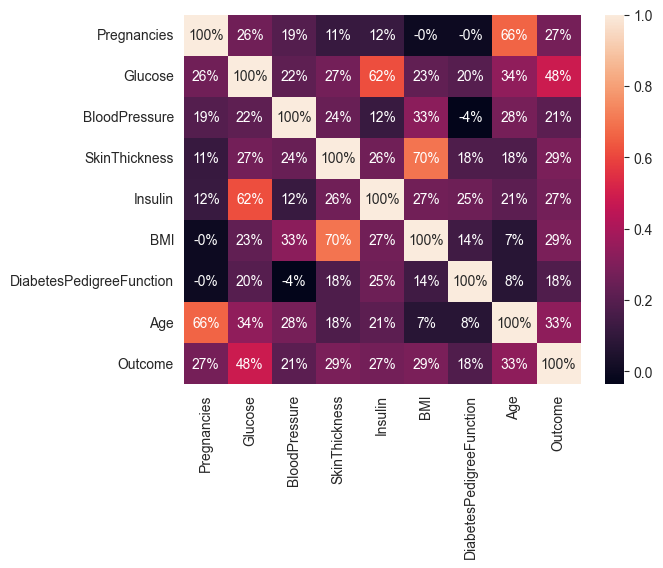

In [32]:
sns.heatmap(cor, annot=True, fmt= "0.0%")

# Model Making Logestic Regression: 
***

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       179
         1.0       0.73      0.68      0.71       106

    accuracy                           0.79       285
   macro avg       0.78      0.77      0.77       285
weighted avg       0.79      0.79      0.79       285

Precision: 0.7346938775510204
Recall: 0.6792452830188679
F1 Score: 0.7058823529411764
ROC-AUC Score: 0.8518498998629703
Log Loss: 0.4655377534051664


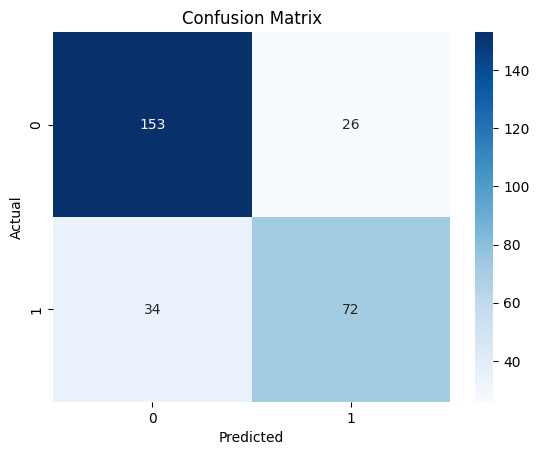

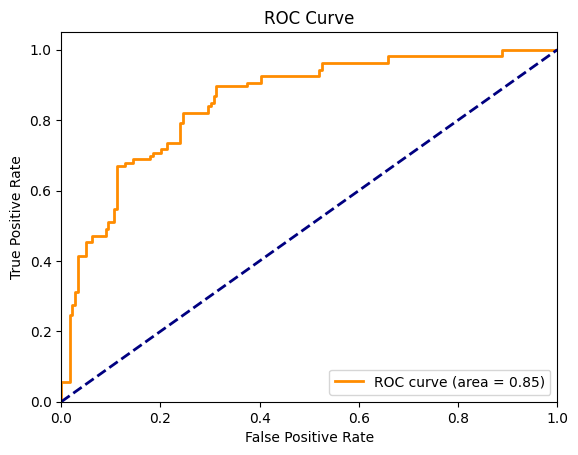

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss, precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Standardized values
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build and fit the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

# Generating and displaying classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

# More Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
logloss = log_loss(y_test, model.predict_proba(X_test))

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC Score: {roc_auc}')
print(f'Log Loss: {logloss}')

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Matrix Visualization
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Model Making Decision Tree: 
***

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.model_selection import GridSearchCV
import numpy as np
import joblib

data = pd.read_csv('./Diabetes.csv') # replace file path on your machine

X = data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin","BMI","DiabetesPedigreeFunction", "Age"]]
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print("Decision Tree Classifier Model Accuracy:", accuracy)




joblib.dump(dtc, './saved_models/dtc.joblib')





num_pregnancies = 2

glucose = 134
blood_pressure = 90
skin_thickness = 232
insulin = 110
bmi = 34.9
diabetes_pedigree = .678
age = 46

user_input = [num_pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree, age]
user_input_s = np.array(user_input).reshape(1,-1)
user_prediction = dtc.predict(user_input_s)

print(f"User Based Prediction {user_prediction[0]}")

# feat_import = dtc.feature_importances_

# print(feat_import)


Decision Tree Classifier Model Accuracy: 0.9747191011235955
User Based Prediction 1.0


c:\Users\14158\miniconda3\envs\internship\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Modeling Making KNN: 
***

In [33]:
from sklearn.model_selection import train_test_split


cols = ["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"]
X = data[cols]
y = data.Outcome

X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'Outcome'], data['Outcome'], stratify = data['Outcome'], random_state=66)


Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.85


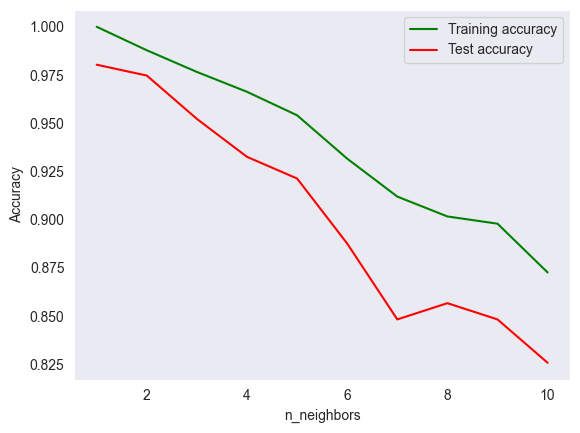

In [34]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

# plot it
plt.plot(neighbors_settings, training_accuracy, label="Training accuracy",color = "green")
plt.plot(neighbors_settings, test_accuracy, label="Test accuracy",color = "r")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()



knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

# Model Making: NEURAL NETWORK
***

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras_tuner import RandomSearch

cols = ["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"]
X = data[cols]
y = data.Outcome

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature scaling using MinMaxScaler
#important: MinMax > Scalar (in terms of accuracy scores for this dataset being used.)
# .92 vs ~.85


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from joblib import dump

#NOTE: 
#save the scalar for app.py so that flask can work correctly
dump(scaler, 'saved_scalars/scaler.joblib')



# model with hyperparameters
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    input_dim=8, activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


# Set up the hyperparameter tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Set more trials for a better search but higher computational cost
    executions_per_trial=3,
    directory='./saved_models/hyperparameter_tuner',
    project_name='diabetes_kt')

# Perform hyperparameter search
tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2)

# Get the best model and evaluate on the test set
best_model = tuner.get_best_models(num_models=1)[0]
test_loss, test_accuracy = best_model.evaluate(X_test_scaled, y_test, verbose=1)

print(f"Best Model Test Loss: {test_loss}, Best Model Test Accuracy: {test_accuracy}")

#Save the model and 
best_model.save('./saved_models/better_model.keras')

Reloading Tuner from ./saved_models/hyperparameter_tuner\diabetes_kt\tuner0.json


c:\Users\14158\miniconda3\envs\internship\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\14158\miniconda3\envs\internship\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9213 - loss: 0.2658  
Best Model Test Loss: 0.2890780568122864, Best Model Test Accuracy: 0.9298245906829834


In [36]:
test_loss, test_accuracy = best_model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict classes on the test set
y_pred = best_model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype(int)  # Using 0.5 as threshold

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Generate a classification report
report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(report)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9213 - loss: 0.2658 
Test Loss: 0.2890780568122864, Test Accuracy: 0.9298245906829834
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Confusion Matrix:
[[174   6]
 [ 14  91]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       180
         1.0       0.94      0.87      0.90       105

    accuracy                           0.93       285
   macro avg       0.93      0.92      0.92       285
weighted avg       0.93      0.93      0.93       285



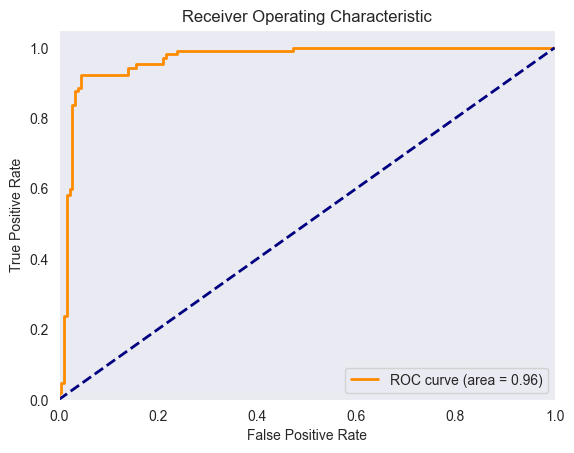

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
